In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("thanksgiving.csv", encoding="Latin-1")

In [3]:
data.columns

Index(['RespondentID', 'Do you celebrate Thanksgiving?',
       'What is typically the main dish at your Thanksgiving dinner?',
       'What is typically the main dish at your Thanksgiving dinner? - Other (please specify)',
       'How is the main dish typically cooked?',
       'How is the main dish typically cooked? - Other (please specify)',
       'What kind of stuffing/dressing do you typically have?',
       'What kind of stuffing/dressing do you typically have? - Other (please specify)',
       'What type of cranberry saucedo you typically have?',
       'What type of cranberry saucedo you typically have? - Other (please specify)',
       'Do you typically have gravy?',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots',
       'Which of these side dishes aretypically served

In [4]:
celebrate = data[data["Do you celebrate Thanksgiving?"] == "Yes"].copy()

In [5]:
def display_counts(counts, title, labels = None):
    print(counts)
    
    labels = labels or counts.index
    
    value_range = range(0, len(counts))
    ax = plt.subplot(111)    
    ax.bar(value_range, counts.values)
    plt.title(title)
    plt.xticks(value_range, labels, rotation = 'vertical')
    plt.show()

In [6]:
typical_main_dish_key = "What is typically the main dish at your Thanksgiving dinner?"

Turkey                    859
Other (please specify)     35
Ham/Pork                   29
Tofurkey                   20
Chicken                    12
Roast beef                 11
I don't know                5
Turducken                   3
Name: What is typically the main dish at your Thanksgiving dinner?, dtype: int64


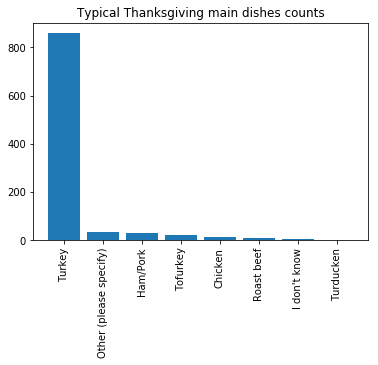

In [7]:
display_counts(celebrate[typical_main_dish_key].value_counts(), "Typical Thanksgiving main dishes counts")

Yes    12
No      8
Name: Do you typically have gravy?, dtype: int64


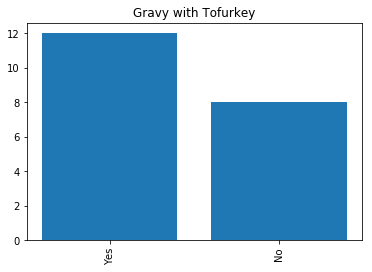

In [8]:
display_counts(celebrate[celebrate[typical_main_dish_key] == "Tofurkey"]
                        ["Do you typically have gravy?"].value_counts(),
               "Gravy with Tofurkey")

In [9]:
def get_notnull_values(series):
    return series[pd.notnull(series)]


Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple      514
Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin    729
Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan      342
dtype: int64


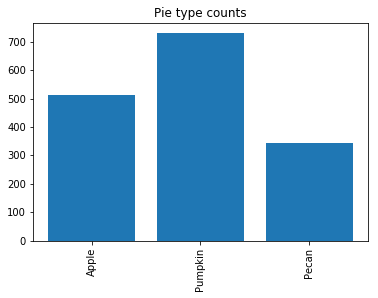

In [10]:
def get_pie_question(pie_type):
    return "Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - " + pie_type

pie_types = ["Apple", "Pumpkin", "Pecan"]
pie_keys = list(map(get_pie_question, pie_types))

pie_type_counts = celebrate[pie_keys].apply(lambda column: len(get_notnull_values(column)))

display_counts(pie_type_counts, "Pie type counts", pie_types)


In [11]:
def get_notnull_values(series):
    return series[pd.notnull(series)]

def get_values_except(series, except_values):
    result = series
    for item in except_values:
        result = result[result != item]
    return result

def extract_column_data(data, column_name, extract_function, except_values = []):
    not_null_values = get_notnull_values(data[column_name])
    considered_values = get_values_except(not_null_values, except_values)
    return considered_values.apply(extract_function)

def display_statistics(data, chart_title):
    print(data.describe())
    display_counts(data.value_counts().sort_index(), chart_title)


count    947.000000
mean      40.089757
std       15.352014
min       18.000000
25%       30.000000
50%       45.000000
75%       60.000000
max       60.000000
Name: Age, dtype: float64
18    185
30    235
45    269
60    258
Name: Age, dtype: int64


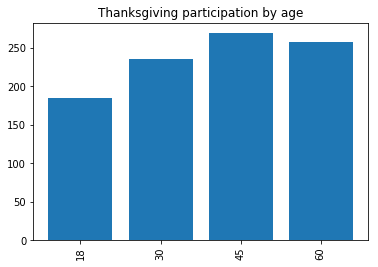

In [12]:
def get_age_from(age_string):
    return int(age_string.split(" ")[0].split("+")[0])

int_age = extract_column_data(celebrate, "Age", get_age_from)
celebrate["age"] = int_age

display_statistics(int_age, "Thanksgiving participation by age")

# Age statistics flaws

Statistics shown above are misleading since age categories are represented by single number that does not adequately describe each bracket.

count       829.000000
mean      75965.018094
std       59068.636748
min           0.000000
25%       25000.000000
50%       75000.000000
75%      100000.000000
max      200000.000000
Name: How much total combined money did all members of your HOUSEHOLD earn last year?, dtype: float64
0          52
10000      60
25000     166
50000     127
75000     127
100000    109
125000     48
150000     38
175000     26
200000     76
Name: How much total combined money did all members of your HOUSEHOLD earn last year?, dtype: int64


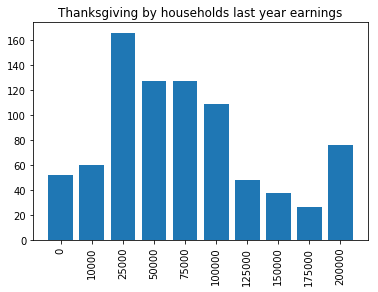

In [13]:
def get_money_from(money_string):
    return int(money_string.split(" ")[0].split("$")[1].replace(",", ""))

int_income = extract_column_data(celebrate,
                                 "How much total combined money did all members of your HOUSEHOLD earn last year?",
                                 get_money_from,
                                 except_values=["Prefer not to answer"])
celebrate["income"] = int_income

display_statistics(int_income, "Thanksgiving by households last year earnings")

# Household earnings statistics flaws

There are same problems as in age statistics.

Thanksgiving is happening at my home--I won't travel at all                         46
Thanksgiving is local--it will take place in the town I live in                     38
Thanksgiving is out of town but not too far--it's a drive of a few hours or less    22
Thanksgiving is out of town and far away--I have to drive several hours or fly       6
Name: How far will you travel for Thanksgiving?, dtype: int64


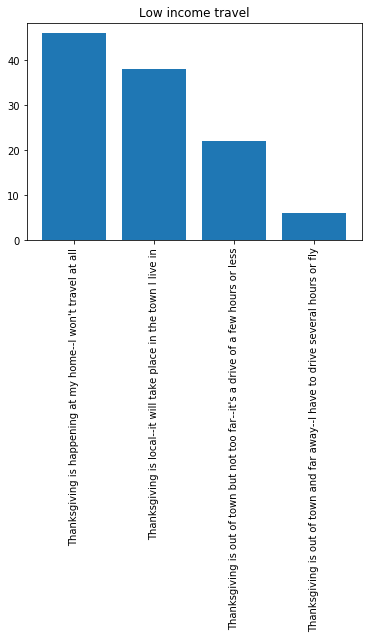

Thanksgiving is happening at my home--I won't travel at all                         301
Thanksgiving is local--it will take place in the town I live in                     199
Thanksgiving is out of town but not too far--it's a drive of a few hours or less    153
Thanksgiving is out of town and far away--I have to drive several hours or fly       64
Name: How far will you travel for Thanksgiving?, dtype: int64


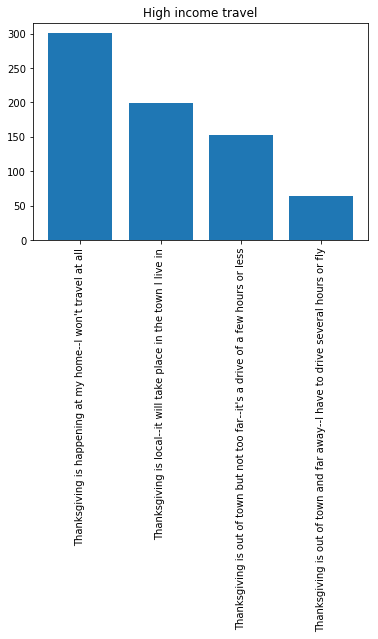

In [14]:
travel = celebrate["How far will you travel for Thanksgiving?"]

display_counts(travel.loc[int_income[int_income < 15000].index].value_counts(), "Low income travel")
display_counts(travel.loc[int_income[int_income >= 15000].index].value_counts(), "High income travel")

# Travel by income

Hypothesis that people with lower income travel more, because they might be younger does not seem to be valid (assumption that younger people have lower income may be wrong, we could use values from age instead). 

In [15]:
def thanksgiving_and_friends(data, aggregated_column):
    return data.pivot_table(index="Have you ever tried to meet up with hometown friends on Thanksgiving night?",
                     columns='Have you ever attended a "Friendsgiving?"',
                     values=aggregated_column)


In [16]:
print(thanksgiving_and_friends(celebrate, "age"))

Have you ever attended a "Friendsgiving?"                  No        Yes
Have you ever tried to meet up with hometown fr...                      
No                                                  42.283702  37.010526
Yes                                                 41.475410  33.976744


In [17]:
print(thanksgiving_and_friends(celebrate, "income"))

Have you ever attended a "Friendsgiving?"                     No           Yes
Have you ever tried to meet up with hometown fr...                            
No                                                  78914.549654  72894.736842
Yes                                                 78750.000000  66019.736842


# Friendsgiving

Friendsgiving appers to be more common for younger people and for people with lower income.